In [70]:
# load packages
#install.packages("imager")
library(jpeg)

#install.packages("foreign")
library(foreign)

#install.packages("gridExtra")
library(gridExtra)

#install.packages("ggplot2")
library(ggplot2)

#install.packages("reshape2")
library(reshape2)

setwd("/Users/Niko/Desktop/Uni/Statistik Master/courses/machine intelligence 2/mi2_homework/mi2_homework")



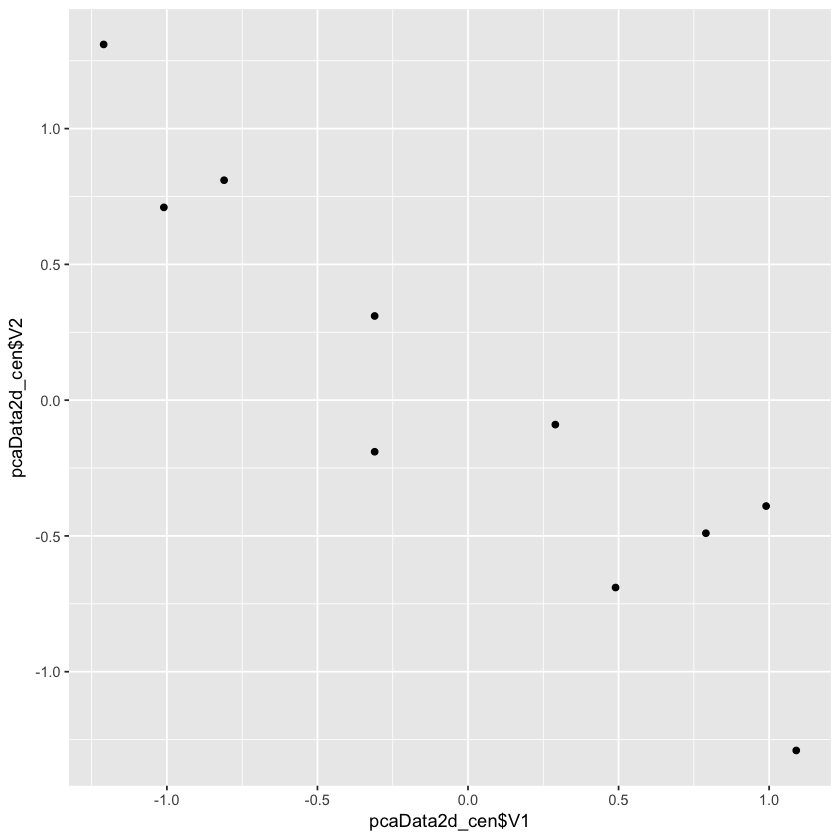

In [71]:
# 2.1 a)

# load data
pcaData2d <- read.csv("Ex2/pca-data-2d.txt", sep = "", header = FALSE)

# calcualte mean matrix
n <- nrow(pcaData2d)
M_mean <- matrix(data=1, nrow=n) %*% cbind(mean(pcaData2d[,1]),
                                           mean(pcaData2d[,2]))

# subtract mean from data set -> "Difference Matrix"
pcaData2d_cen <- pcaData2d - M_mean

# plot centered matrix
ggplot(pcaData2d_cen, aes(x=pcaData2d_cen$V1, y=pcaData2d_cen$V2)) + geom_point()

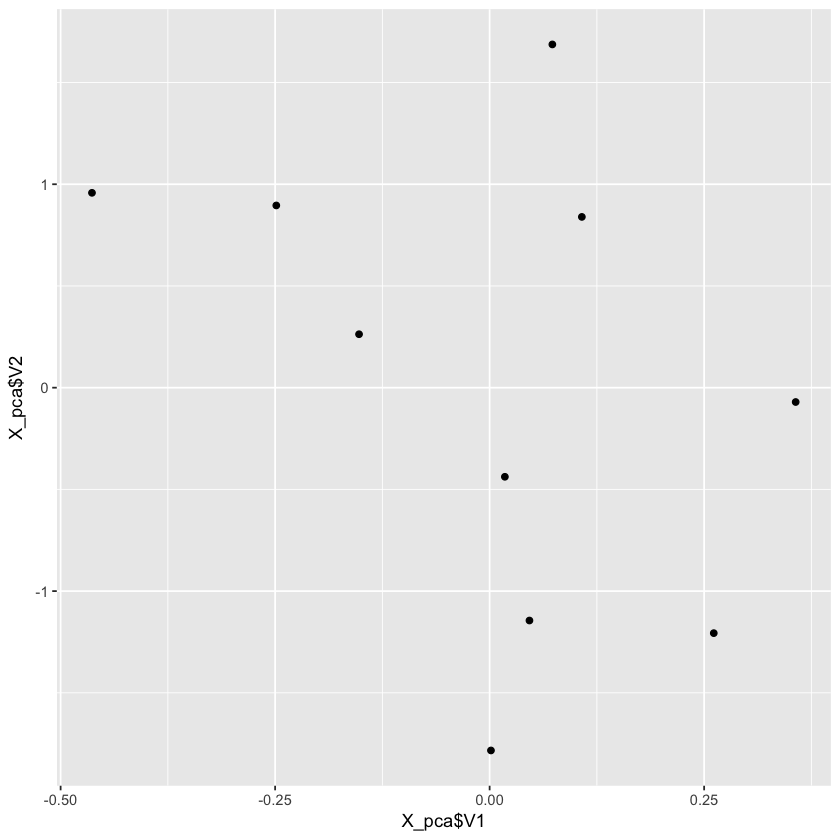

In [72]:
# 2.1 b)

# convert df to matrix
D <- as.matrix(pcaData2d_cen)

# compute Covariance Matrix C
C <- (n-1)^-1 * t(D) %*% D

# Eigenvalues of C, Eigenvectors in P
ev <- eigen(C)
P  <- ev$vectors

# transform D
D_tr <- P %*% t(D)

# in ggplot2 plottable data frame
X_pca <- as.data.frame(t(D_tr)) 

# plot of the transformed set
ggplot(X_pca, aes(x=X_pca$V1, y=X_pca$V2)) + geom_point()

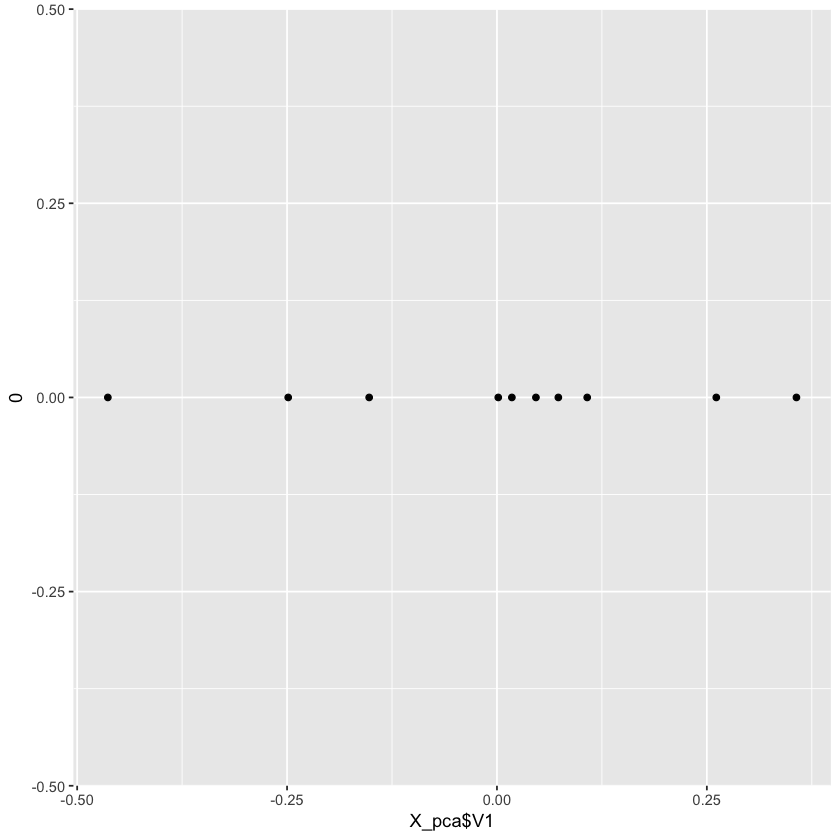

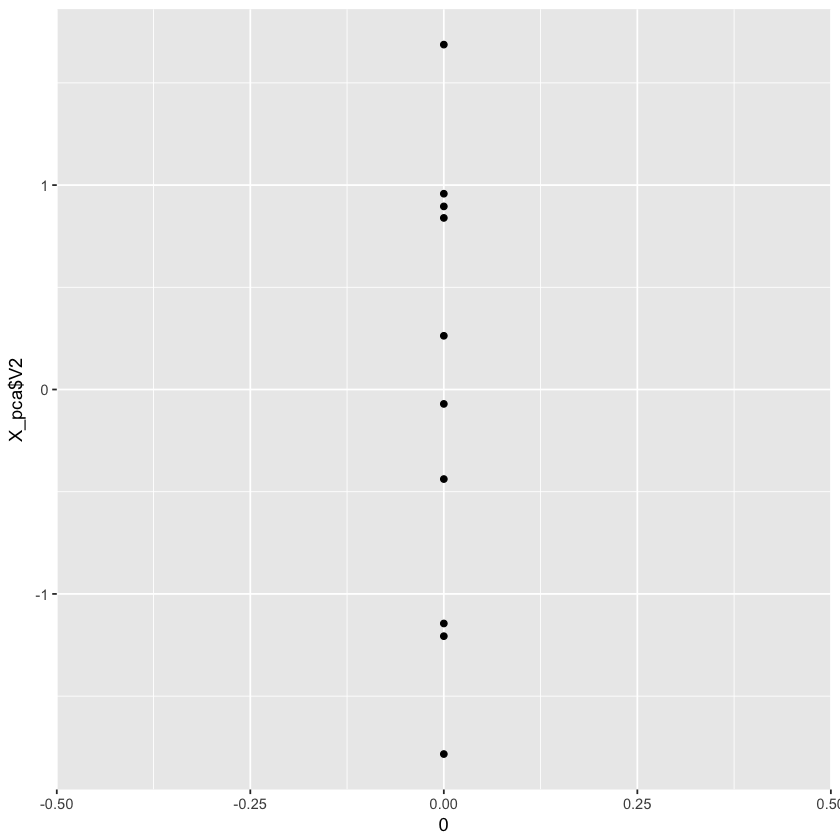

In [73]:
# 2.1 c)


# plot only PC1 
ggplot(X_pca, aes(x=X_pca$V1, y=0)) + geom_point()

# plot only PC2
ggplot(X_pca, aes(x=0, y= X_pca$V2)) + geom_point()

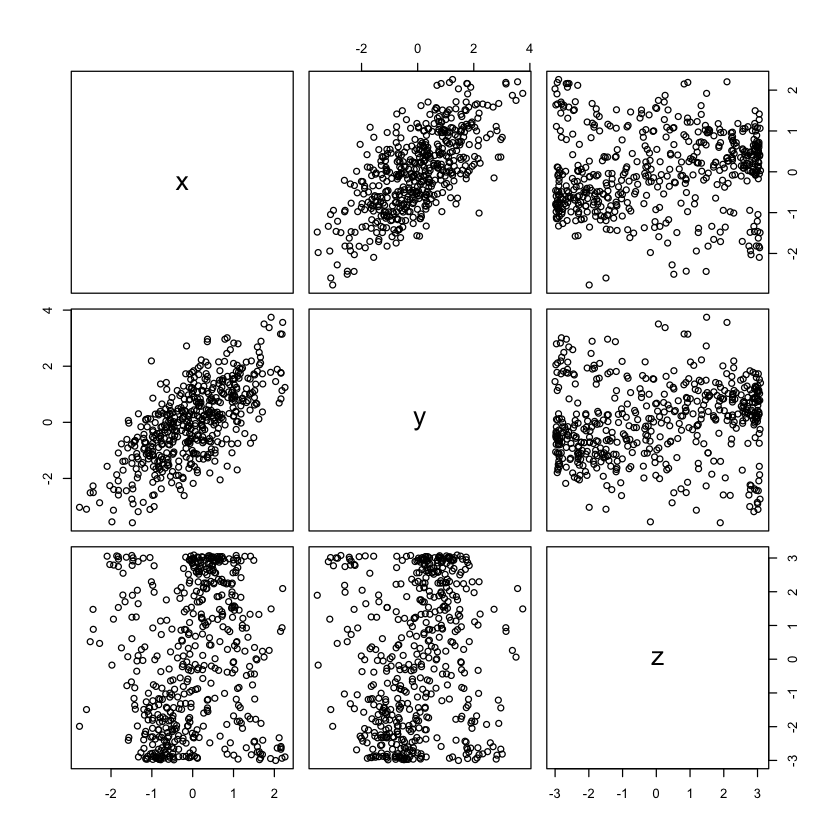

In [74]:
# 2.2 a)


# load data set
pcaData3d <- read.csv("Ex2/pca-data-3d.txt")

# centering
n_3 <- nrow(pcaData3d)
M3_mean <- matrix(data=1, nrow=n_3) %*% colMeans(pcaData3d)

# subtract mean from data set -> "Difference Matrix"
D3 <- pcaData3d - M3_mean

# scatterplot matrix
pairs(D3)

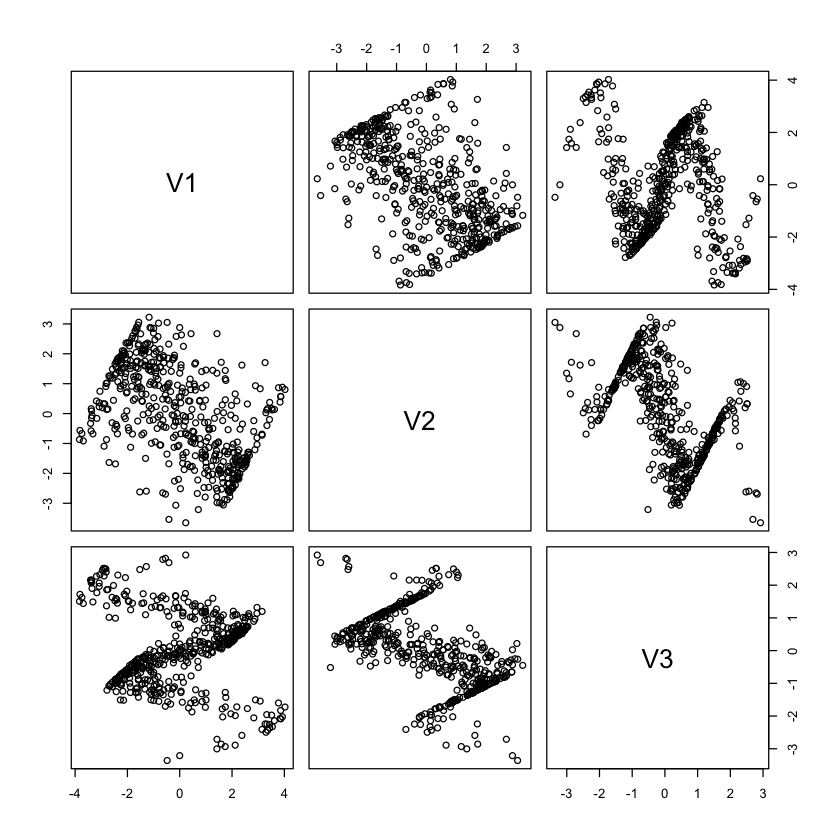

In [75]:
# 2.2 b)

# convert df to matrix
D3 <- as.matrix(D3)

# compute Covariance Matrix C
C3 <- (n_3-1)^-1 * t(D3) %*% D3

# Eigenvalues of C3, Eigenvectors in P3
ev3 <- eigen(C3)
P3  <- ev3$vectors

# transform D3
D3 <- P3 %*% t(D3)
X_3pca <- as.data.frame(t(D3)) 
pairs(X_3pca)

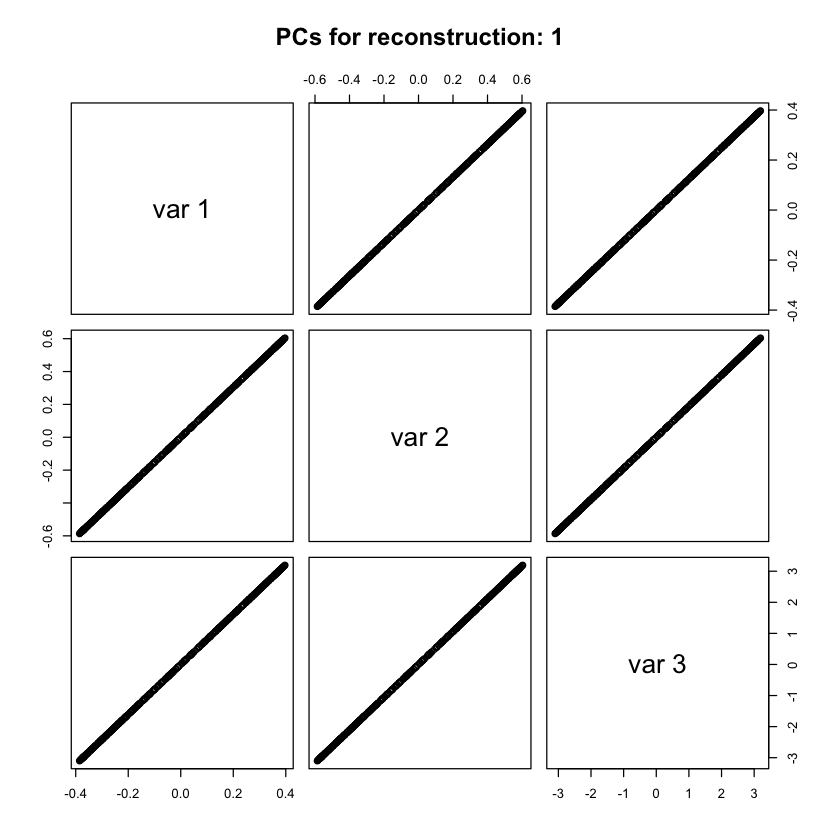

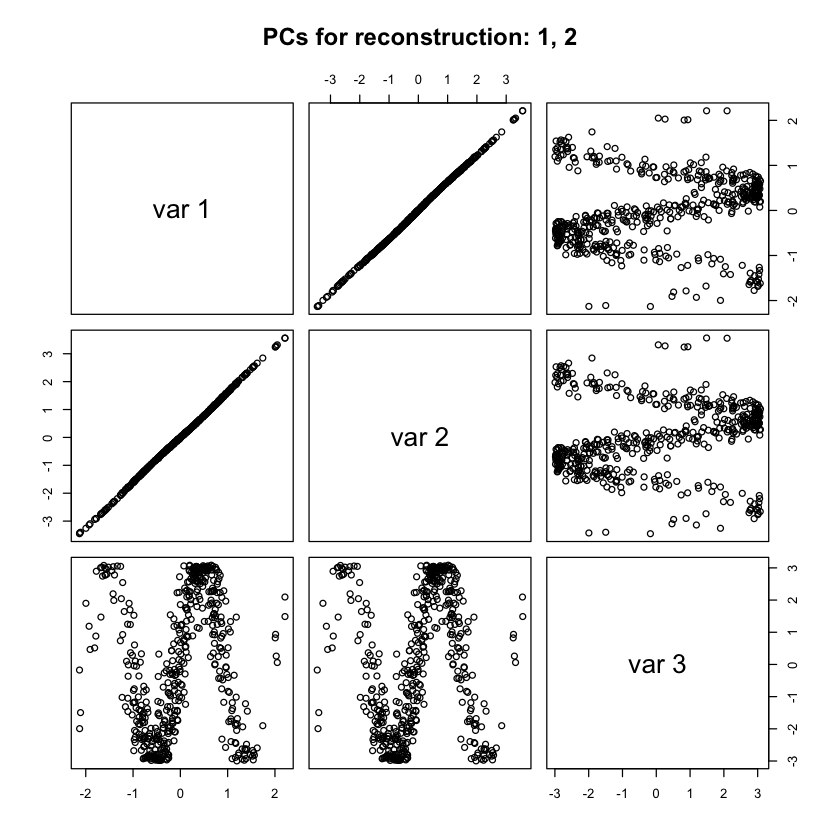

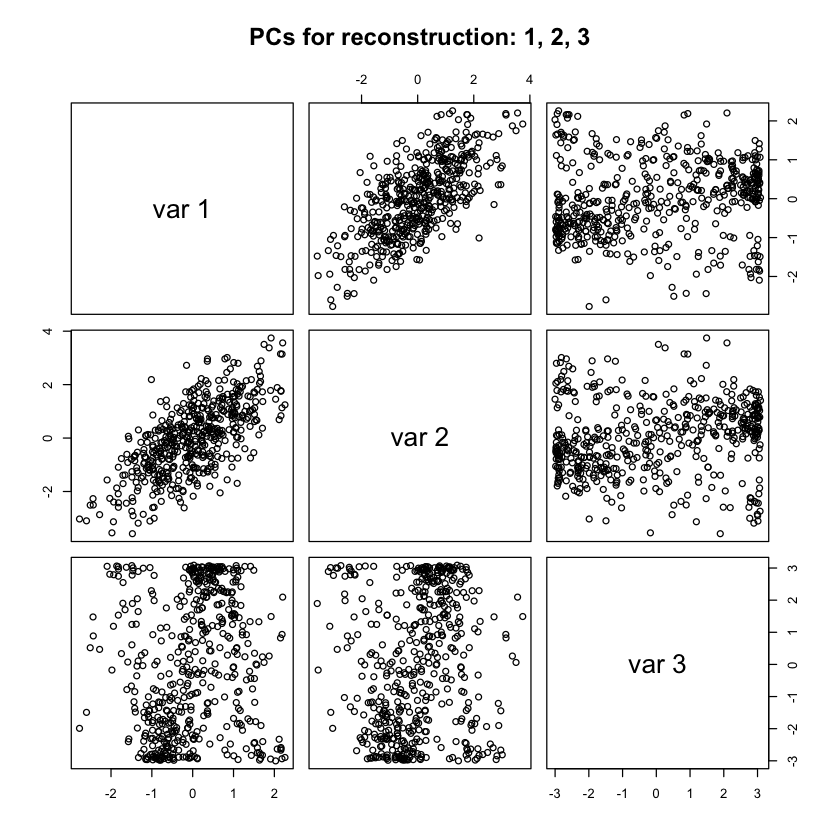

In [76]:
# 2.2 c)


D3 <- pcaData3d - M3_mean

# convert df to matrix
D3 <- as.matrix(D3)

# compute Covariance Matrix C
C3 <- (n_3-1)^-1 * t(D3) %*% D3

eigen_vals <- eigen(C3)$values
eigen_vecs <- eigen(C3)$vectors

# compute pc scores
#pc_scores <- prcomp(D3)

pc_scores_1 <- D3 %*% eigen_vecs[, 1]
pc_scores_1_2 <- D3 %*% eigen_vecs[, 1:2]
pc_scores_1_2_3 <- D3 %*% eigen_vecs[, 1:3]


pca_reconstruction_1 <- pc_scores_1 %*% t(eigen_vecs[, 1])
pairs(pca_reconstruction_1, main = "PCs for reconstruction: 1")

pca_reconstruction_1_2 <- pc_scores_1_2 %*% t(eigen_vecs[, 1:2])
pairs(pca_reconstruction_1_2, main = "PCs for reconstruction: 1, 2")

pca_reconstruction_1_2_3 <- pc_scores_1_2_3 %*% t(eigen_vecs[, 1:3])
pairs(pca_reconstruction_1_2_3, main = "PCs for reconstruction: 1, 2, 3")

# for reconstruction of uncentered data, add mean veactor to each column (add M3)

**Interpretation**
Obviously, the first two PCs are useful here. Plotting only the first PC alone 
does not yield a lot of information (only about the spread in this direction). 
When taking into account the first two PCs, one can see the (possibly) sinusoidal
trend in the data. Using all three PCs yields the original centered COV matrix
that was plotted in 2.2 a). This is oubvious because due to the orthonormality
of the eigenvectors eigen_vecs %*% t(eigen_vecs) will yield an identity matrix,
hence, when multiplying this matrix with the centered COV matrix D3, the COV
matrix remains unchanged. However, one could argue that including the third PC
adds too much noise to the data and the trends are harder to detect in the 
scatter plot matrix. Therefore, the first two PCs should be chosen. Looking
at the eigenvalues supports this.


In [77]:
# 2.3 a)

# load data
expDat <- read.csv("Ex2/expDat.txt", sep = ",", header = TRUE)

# calculate mean matrix
n <- nrow(expDat[2:ncol(expDat)])
M_mean <- matrix(data=1, nrow=n) %*% colMeans(expDat[2:ncol(expDat)])
# subtract mean from data set 
expDat_cen <- expDat[2:ncol(expDat)] - M_mean

# convert df to matrix
D <- as.matrix(expDat_cen)
# compute Covariance Matrix C
C <- (n-1)^-1 * t(D) %*% D
# Eigenvalues of C, Eigenvectors in P
ev <- eigen(C)
P  <- ev$vectors

# print principal components
print(P)

            [,1]       [,2]         [,3]        [,4]        [,5]        [,6]
 [1,] -0.2317007 -0.2183058 -0.104406940  0.12313067 -0.05816656 -0.41701805
 [2,] -0.2036073 -0.1992018 -0.229536067 -0.31129876  0.26325604  0.15196683
 [3,] -0.2500715 -0.2265650 -0.374488207 -0.06571507 -0.31672176  0.27965257
 [4,] -0.2368622  0.2568714 -0.025102114  0.17449749  0.33486862  0.17439629
 [5,] -0.2404493  0.1581708 -0.240553124 -0.45952533 -0.03231931 -0.13920332
 [6,] -0.2044047  0.2208849 -0.172278294 -0.02449325  0.13124224  0.08235568
 [7,] -0.2405699 -0.1948711  0.103867339 -0.18318469  0.18237494 -0.16507066
 [8,] -0.2458614 -0.1618543  0.163636641 -0.08022182 -0.07824362 -0.23240601
 [9,] -0.1773770  0.2263329 -0.281368594  0.57605734 -0.12877602  0.02341982
[10,] -0.1975186 -0.1274600  0.003365382  0.07196717  0.12468248  0.33329940
[11,] -0.2335105 -0.2675393  0.415634996  0.21872101 -0.15874409  0.35421132
[12,] -0.2592469 -0.1754496  0.161449401  0.26505012  0.12047236 -0.49519020

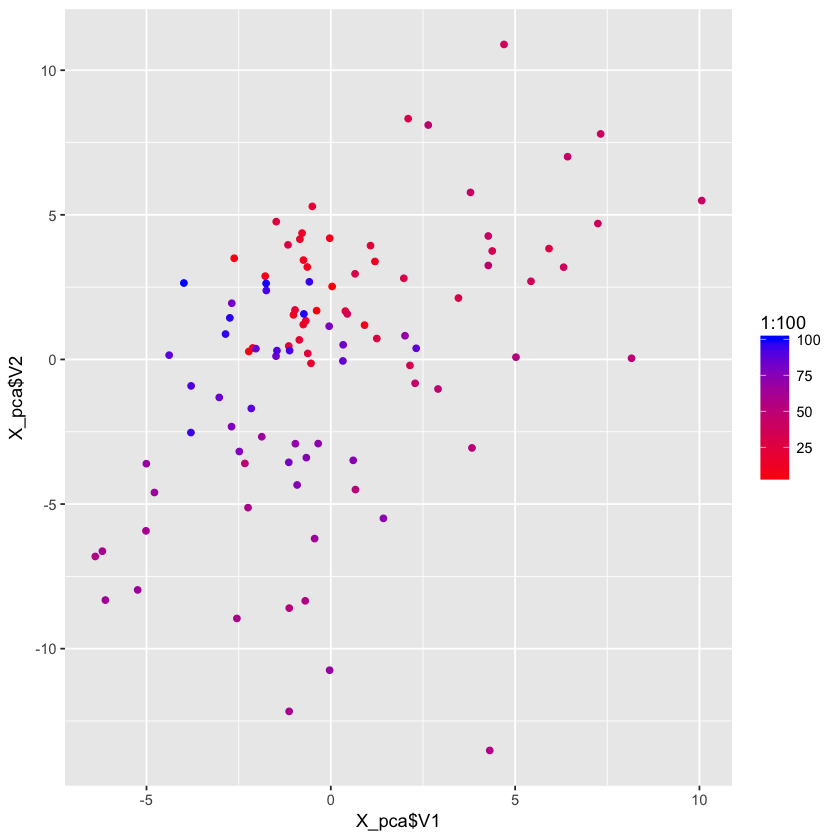

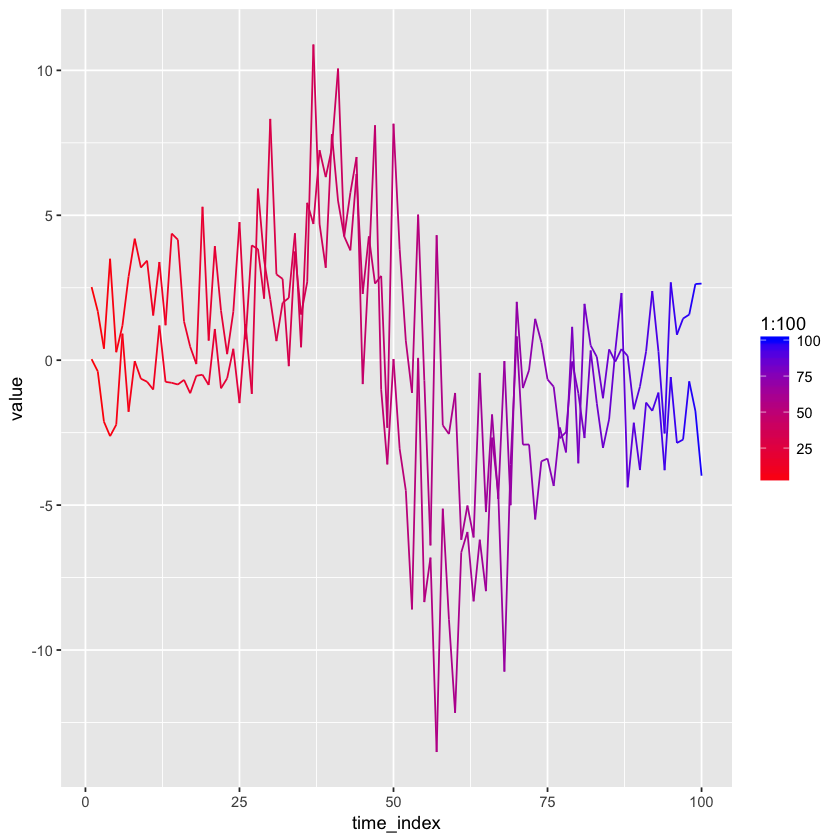

In [78]:
# 2.3 b)

# transform D
D_tr <- P %*% t(D)
# in ggplot2 plottable data frame
X_pca <- as.data.frame(t(D_tr)) 

#scatter plot
ggplot(X_pca, aes(x=X_pca$V1, y=X_pca$V2)) + scale_colour_gradient(low = "red", high = "blue") + geom_point(aes(colour=1:100))


#line plot
df <- data.frame(expDat[,1], X_pca$V1, X_pca$V2)
colnames(df)[1] <- "time_index"

ggplot(df, aes(x=time_index, y=value)) + 
    scale_colour_gradient(low = "red", high = "blue") + 
    geom_line(aes(y=X_pca$V1, colour=1:100)) + 
    geom_line(aes(y=X_pca$V2,colour=1:100))

In [79]:
# 2.3 c)

newDat <- apply(expDat[2:21], 2, sample)

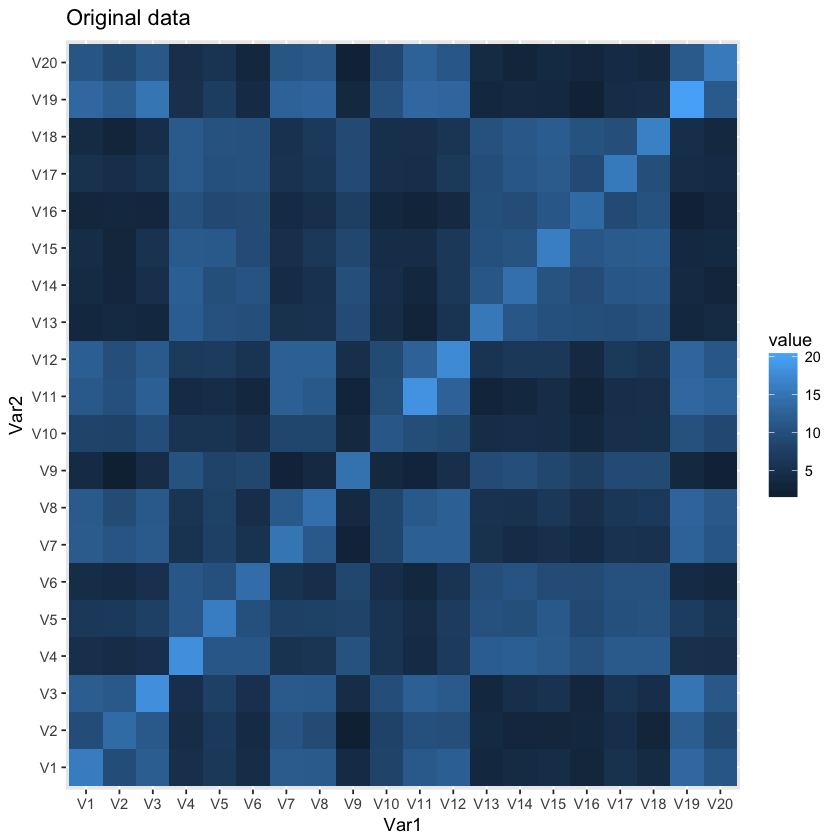

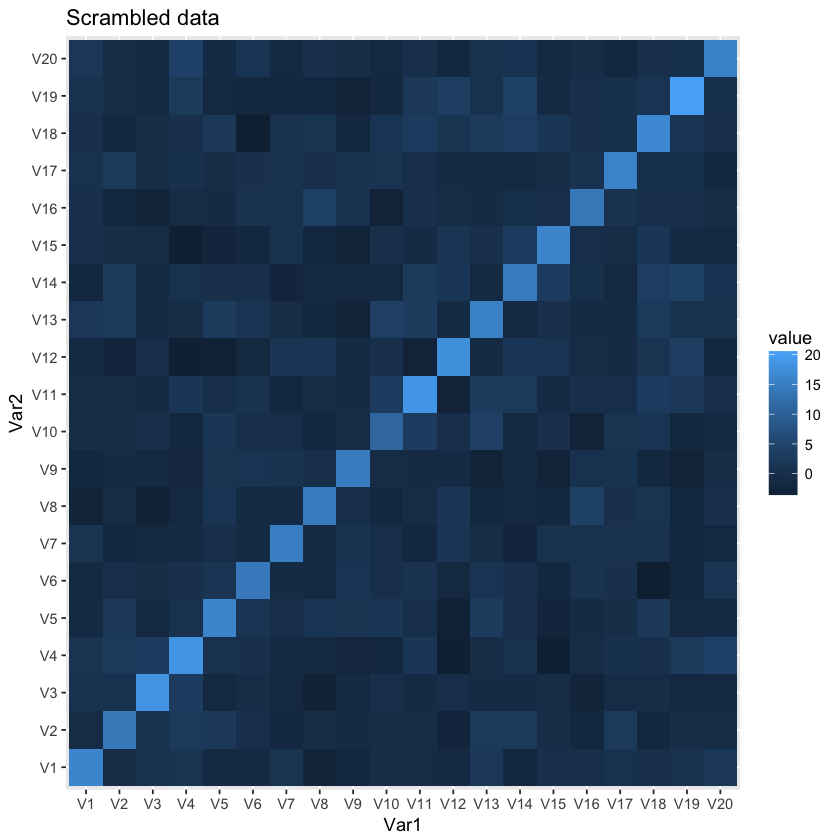

null device 
          1

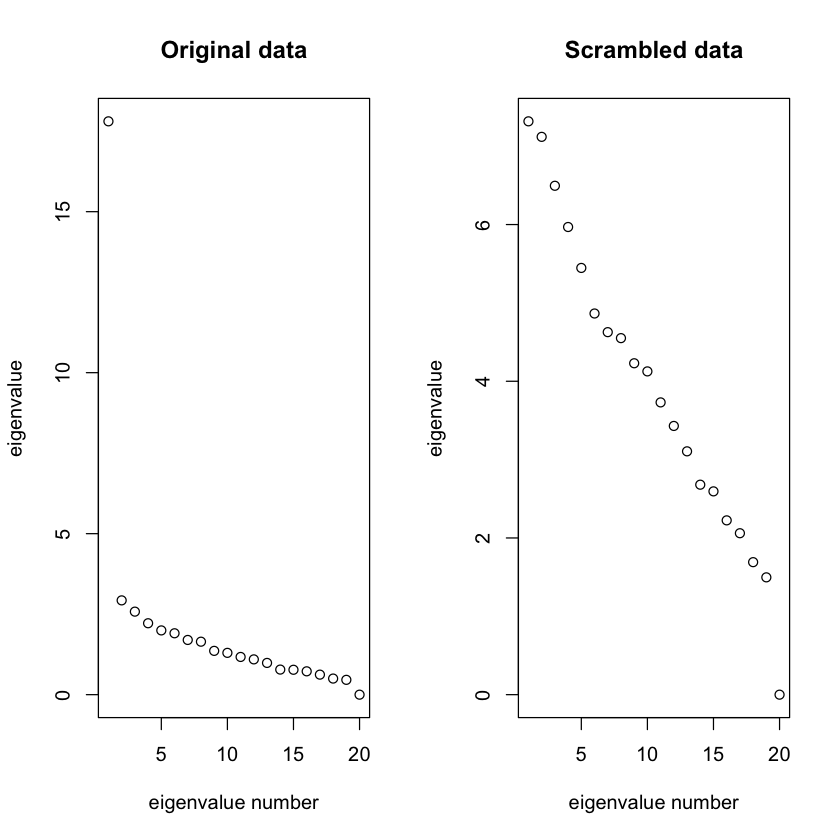

In [80]:
# 2.3 d)

# shuffled dataset
# calculate mean matrix of new data set
n_new <- nrow(newDat)
M_mean_new <- matrix(data=1, nrow=n_new) %*% colMeans(newDat)
# subtract new mean from shuffled data set
Dat_cen_new <- newDat - M_mean_new
# compute Covariance Matrix C_new 
C_new <- (n_new-1)^-1 * t(Dat_cen_new) %*% Dat_cen_new



# convert cov matrizes to data frame for easier plotting
C_melted <- melt(C)
C_melted_new <- melt(C_new)

# plot heatmaps
ggplot(data = C_melted, aes(x=Var1, y=Var2, fill=value)) + 
  geom_tile() + ggtitle("Original data")

ggplot(data = C_melted_new, aes(x=Var1, y=Var2, fill=value)) + 
  geom_tile() + ggtitle("Scrambled data")


# scree plots

eigenvalues_original <- eigen(scale(C, center = TRUE))$values
eigenvalues_scrambled <- eigen(scale(C_new, center = TRUE))$values

par(mfrow = c(1, 2))
plot(1: length(eigenvalues_original), eigenvalues_original, 
     main = "Original data", xlab = "eigenvalue number", ylab = "eigenvalue")
plot(1: length(eigenvalues_scrambled), eigenvalues_scrambled, 
     main = "Scrambled data", xlab = "eigenvalue number", ylab = "eigenvalue")

dev.off()



**Interpretation**
Due to the scrambling of the data, the PC structure is a lot less clear in the 
second plot, i.e. the decline of the eigenvalues is a lot more shallow compared to the plot of the original data, where the first eigenvalue is by far the largest. 
This is plausibe, since the data got randomized, i.e.the resulting covariance 
matrix is random as well.

**2.3 e)** 

Shuffeling the data rowwise in the same sequence for all columns does not affect
the resulting covariance matrix. This is easy to see without programming, since
both, variances and covariances are based on element-wise sums of squared errors. 
For summing over a number of elements, the order is not relevant. Therefore, the 
variances remain unchanged even if the data was not shuffeled in the same sequence
since they do not depend on the values of other variables.
However, for the covariances this is important because otherwise the relationship
between the features would change. But here, since the rows 
are shuffeled in the same way for all columns (i.e. features), the relationships 
(covariances) between the features remain the same as well.


In [81]:
# helper function for patches

get_patch <- function(matrix, h, w, return_vector = FALSE){
    
    h <- h-1
    w <- w-1
    
    n <- nrow(matrix)
    p <- ncol(matrix)
    
    h_sample <- sample(1:n, 1, FALSE)
    w_sample <- sample(1:p, 1, FALSE)
    
    if((h_sample + h) > n) {
        h_patch <- (h_sample - h):h_sample
    }else{
        h_patch <- h_sample:(h_sample + h)
    }
    
    if((w_sample + w) > p) {
        w_patch <- (w_sample - w):w_sample
    }else{
        w_patch <- w_sample:(w_sample + w)
    }
    
    if(return_vector == FALSE){
        return(matrix[h_patch, w_patch])
    }else{
        return(as.vector(matrix[h_patch, w_patch]))
    }
}


In [82]:
# 2.4 a) buildings

path <- "/Users/Niko/Desktop/Uni/Statistik Master/courses/machine intelligence 2/mi2_homework/mi2_homework/Ex2/imgpca"

f <- file.path(path, c("b1.jpg","b2.jpg", "b3.jpg", "b4.jpg", "b5.jpg", "b6.jpg", "b7.jpg", "b8.jpg", "b9.jpg", "b10.jpg"))

d <- lapply(f, readJPEG)


total_matrix_b <- matrix(nrow = 0, ncol = 256)

for(i in 1:length(d)){
    #set.seed(123)
    tmp1 <- t(replicate(500, get_patch(d[[i]], 16, 16, return_vector = TRUE), simplify = "vector"))
    #tmp2 <- replicate(10, get_patch(d[[i]], 16, 16, return_vector = TRUE))
    total_matrix_b <- rbind(total_matrix_b, tmp1)
}

# Show dimensions of matrix for building patches
dim(total_matrix_b)



[1] 5000  256

In [83]:
# 2.4. a) Nature

path <- "/Users/Niko/Desktop/Uni/Statistik Master/courses/machine intelligence 2/mi2_homework/mi2_homework/Ex2/imgpca"

f <- file.path(path, c("n1.jpg","n2.jpg", "n3.jpg", "n4.jpg", "n5.jpg", "n6.jpg", "n7.jpg", "n8.jpg", "n9.jpg", "n10.jpg"))

nat <- lapply(f, readJPEG)


total_matrix_n <- matrix(nrow = 0, ncol = 256)

for(i in 1:length(nat)){
    #set.seed(123)
    tmp1 <- t(replicate(500, get_patch(nat[[i]], 16, 16, return_vector = TRUE), simplify = "vector"))
    #tmp2 <- replicate(10, get_patch(nat[[i]], 16, 16, return_vector = TRUE))
    total_matrix_n <- rbind(total_matrix_n, tmp1)
}

# Show dimensions of matrix for nature patches
dim(total_matrix_n)

[1] 5000  256

In [84]:
# 2.4 b)

total_matrix_n_centered <- scale(total_matrix_n, center = TRUE, scale = FALSE)
total_matrix_b_centered <- scale(total_matrix_b, center = TRUE, scale = FALSE)

pcs_b <- eigen(cov(total_matrix_b_centered))$vectors
pcs_n <- eigen(cov(total_matrix_n_centered))$vectors


amount_pca <- 24
pca_patchesn <- pca_patchesb <- vector("list", length = amount_pca)

for(i in 1:24){
    
    pca_patchesn[[i]] <- melt(matrix(pcs_n[, i], 16, 16))
    pca_patchesb[[i]] <- melt(matrix(pcs_b[, i], 16, 16))
    
}


heatmap_custom <- function(matrix){
    g1 <- ggplot(data = matrix, aes(x=Var1, y=Var2, fill=value)) + 
        geom_tile() + 
        scale_fill_continuous(low = "white", high = "black") + 
        guides(fill = FALSE) +
        theme(axis.title.x=element_blank(),
              axis.text.x=element_blank(),
              axis.ticks.x=element_blank(),
              axis.title.y=element_blank(),
              axis.text.y=element_blank(),
              axis.ticks.y=element_blank())
                                   
    
    return(g1)
}

plotlist_b <- lapply(pca_patchesb, heatmap_custom)
plotlist_n <- lapply(pca_patchesn, heatmap_custom)


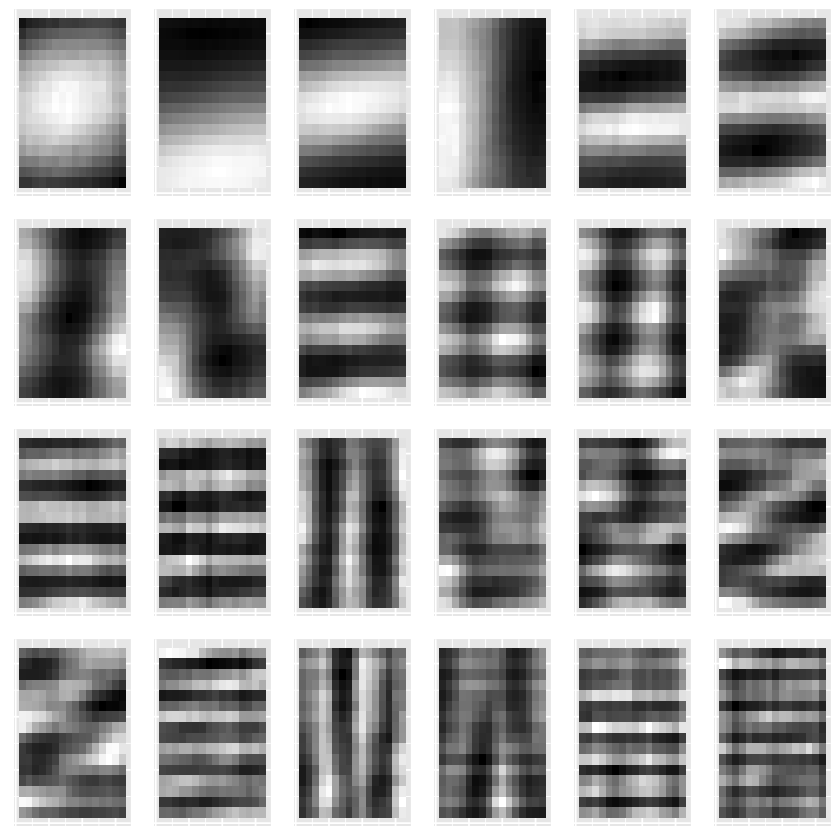

In [85]:
# buildings
do.call("grid.arrange", c(plotlist_b, ncol=6))

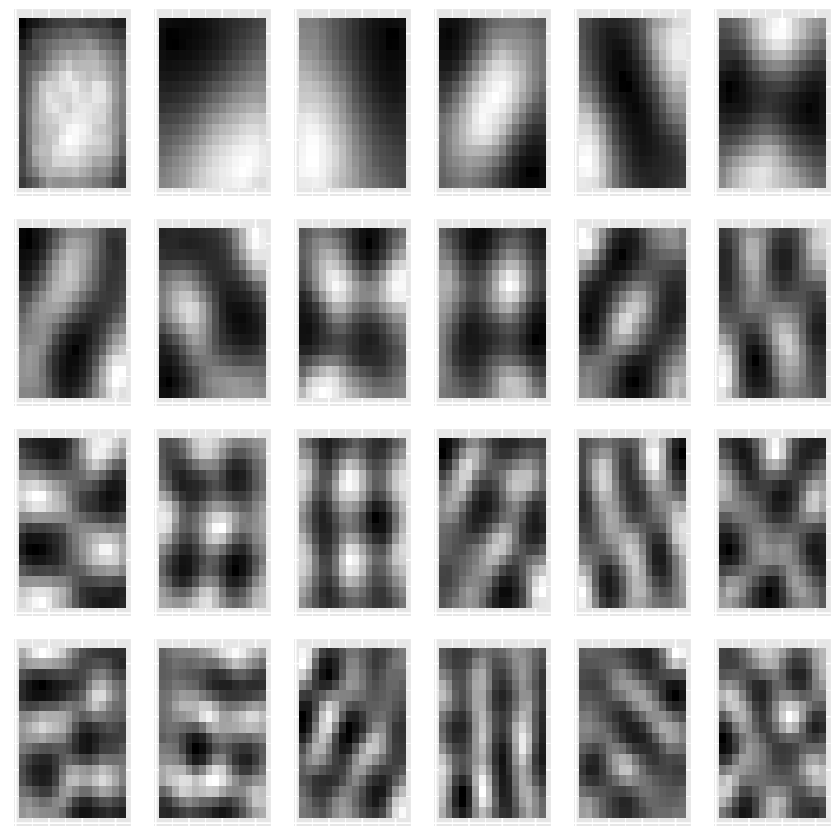

In [86]:
# nature
do.call("grid.arrange", c(plotlist_n, ncol=6))

**Comparison of PCs**
One can see that the PCs of both image groups are rather similar, in terms of
the variance they account for (i.e. about 65% by the first PC in both cases).
However, the second PC of the nature buildings accounts for about 10.7% of the
variance while the second PC from the nature images only accounts for about
5.32%

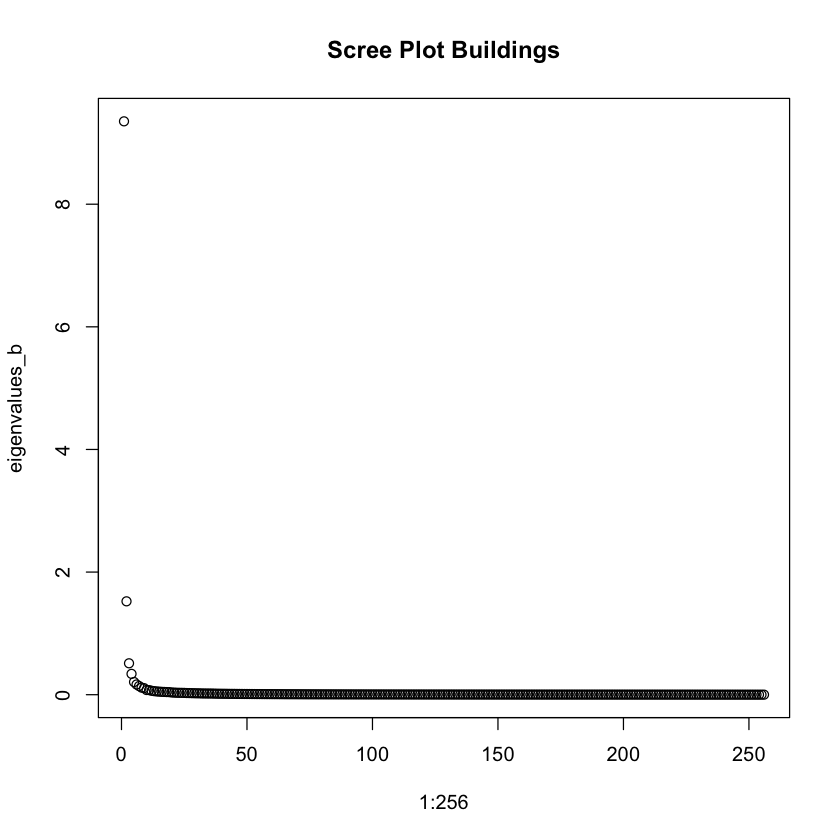

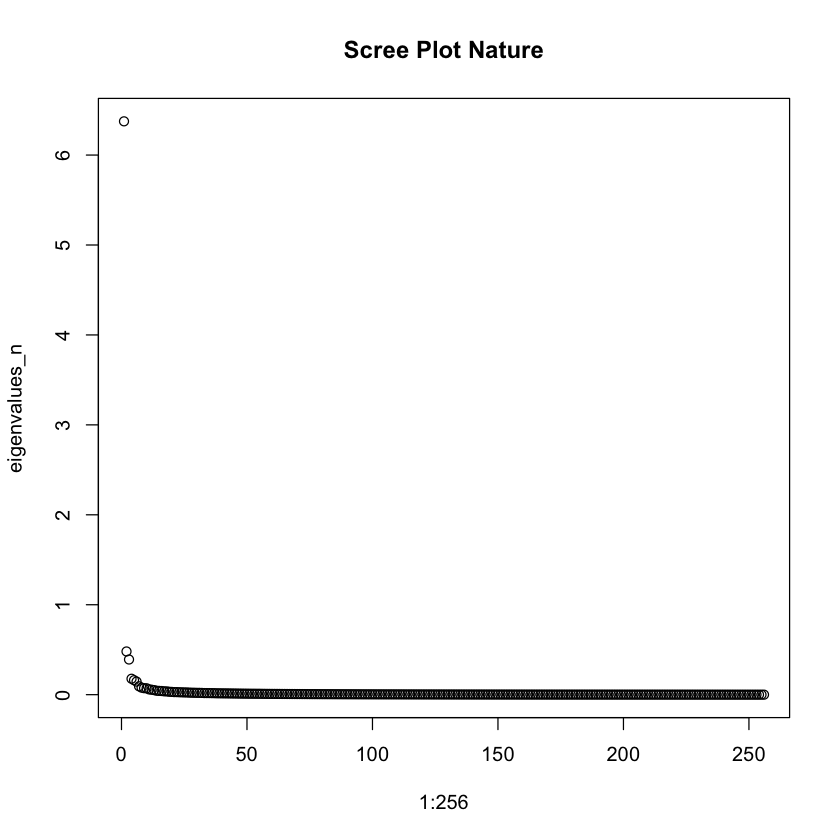

In [87]:
# 2.4 c)

eigenvalues_b <- eigen(cov(total_matrix_b_centered))$values
plot(1:256, eigenvalues_b, main = "Scree Plot Buildings")

cov_b <- cov(total_matrix_b)



eigenvalues_n <- eigen(cov(total_matrix_n_centered))$values
plot(1:256, eigenvalues_n, main = "Scree Plot Nature")

**Buildings**
Based on the scree plot we would choose the first 4 PCs for the building images.
Because of high eigenvalue and before the elobow of the Curve. Based on the 
Kaiser criterion (extract PCs with eigenvalues > 1) we would extract the first 
two PCs.
Compression ratio: 4/256

**Nature**
Based on the scree plot we would choose the first 3 PCs for the nature images.
Because of high eigenvalue and before the elobow of the Curve. Based on the 
Kaiser criterion (see above) we would even extract only the first PC
Compression ratio: 3/256